In [1]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

    100% |████████████████████████████████| 993kB 19.2MB/s 


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
#import 
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import models
from keras import layers
from keras import callbacks
from keras import regularizers
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
data = pd.read_csv('/content/drive/My Drive/kagglecomption digit/train.csv')
data = data.values
label = data[:,0]
data = data[:,1:]


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


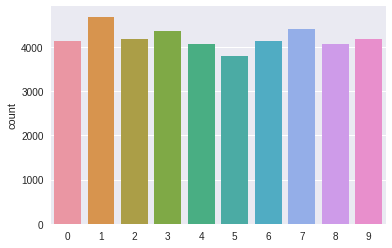

In [6]:
import seaborn as sns
graph = sns.countplot(label)

In [0]:

train_data=data[:35000,:]
valid_data=data[35000:,:]

train_data = train_data.astype('float32')/255.0
train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
valid_data = valid_data.astype('float32')/255.0
valid_data = valid_data.reshape(valid_data.shape[0], 28, 28, 1).astype('float32')



train_label = label[:35000]
valid_label = label[35000:]

train_label = to_categorical(train_label)
valid_label = to_categorical(valid_label)



In [0]:
#build and train a cnn
def nnmodel():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation = 'relu'))
  model.add(layers.Dropout(0.4))
  model.add(layers.Dense(10, activation= 'softmax'))
  
  return model

  

In [10]:
model = nnmodel()
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics=['acc'])
validation_split = 0.0
history = model.fit(train_data, 
                    train_label,  
                    epochs=20, 
                    batch_size=256, 
                    validation_split=validation_split, 
                    verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 7s - loss: 0.4971 - acc: 0.8464
Epoch 2/20
 - 3s - loss: 0.1241 - acc: 0.9625
Epoch 3/20
 - 3s - loss: 0.0749 - acc: 0.9766
Epoch 4/20
 - 3s - loss: 0.0577 - acc: 0.9822
Epoch 5/20
 - 3s - loss: 0.0452 - acc: 0.9859
Epoch 6/20
 - 3s - loss: 0.0384 - acc: 0.9877
Epoch 7/20
 - 3s - loss: 0.0313 - acc: 0.9895
Epoch 8/20
 - 3s - loss: 0.0260 - acc: 0.9921
Epoch 9/20
 - 3s - loss: 0.0226 - acc: 0.9925
Epoch 10/20
 - 3s - loss: 0.0200 - acc: 0.9938
Epoch 11/20
 - 3s - loss: 0.0182 - acc: 0.9939
Epoch 12/20
 - 3s - loss: 0.0146 - acc: 0.9953
Epoch 13/20
 - 3s - loss: 0.0131 - acc: 0.9956
Epoch 14/20
 - 3s - loss: 0.0126 - acc: 0.9960
Epoch 15/20
 - 3s - loss: 0.0108 - acc: 0.9965
Epoch 16/20
 - 3s - loss: 0.0098 - acc: 0.9968
Epoch 17/20
 - 3s - loss: 0.0085 - acc: 0.9971
Epoch 18/20
 - 3s - loss: 0.0073 - acc: 0.9979
Epoch 19/20
 - 3s - loss: 0.0080 - acc: 0.9974
Epoch 20/20
 - 3s - loss: 0.0072 - acc: 0.9979


In [0]:
model.save("/content/drive/My Drive/handwrittendigit/model.h5")


In [0]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)